In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
SEED = 42

## Loading data

In [4]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

In [5]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
train_df.describe(include=[object])

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_df.describe(include='all')

PassengerId      Pclass              Name   Sex         Age  \
count    418.000000  418.000000               418   418  332.000000   
unique          NaN         NaN               418     2         NaN   
top             NaN         NaN  Kelly, Mr. James  male         NaN   
freq            NaN         NaN                 1   266         NaN   
mean    1100.500000    2.265550               NaN   NaN   30.272590   
std      120.810458    0.841838               NaN   NaN   14.181209   
min      892.000000    1.000000               NaN   NaN    0.170000   
25%      996.250000    1.000000               NaN   NaN   21.000000   
50%     1100.500000    3.000000               NaN   NaN   27.000000   
75%     1204.750000    3.000000               NaN   NaN   39.000000   
max     1309.000000    3.000000               NaN   NaN   76.000000   

             SibSp       Parch    Ticket        Fare            Cabin Embarked  
count   418.000000  418.000000       418  417.000000               91      418  
unique         NaN         NaN       363         NaN               76        3  
top            NaN         NaN  PC 17608         NaN  B57 B59 B63 B66        S  
freq           NaN         NaN         5         NaN                3      270  
mean      0.447368    0.392344       NaN   35.627188              NaN      NaN  
std       0.896760    0.981429       NaN   55.907576              NaN      NaN  
min       0.000000    0.000000       NaN    0.000000              NaN      NaN  
25%       0.000000    0.000000       NaN    7.895800              NaN      NaN  
50%       0.000000    0.000000       NaN   14.454200              NaN      NaN  
75%       1.000000    0.000000       NaN   31.500000              NaN      NaN  
max       8.000000    9.000000       NaN  512.329200              NaN      NaN

#### Assumptions from analyzing the data
* passengerId
* Survived - learning target
* Pclass - ticket class (1,2,3); keep (all values present)
* Name - drop (all values present)
* Sex - keep (all values present)
* Age - keep (feel missing values, use mean?)
* SibSp - # of siblings/spouses aboard; keep (all values present)
* Parch - # of parents/children aboard; keep (all values present)
* Ticket - ticket number; drop (all values present)
* Fare - passenger fare; keep? (all values present in training data, missing in test data)
* Cabin - cabin number; drop (most values missing)
* Embarked - port of embarkation (C,Q,S); keep? (feel missing values)

##### Features to drop:
* Name
* Ticket
* Cabing

##### Features to fix:
* Age
* Embarked
* Fare (test data)

# Check feature correlation with survival

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

Sex  Survived
0  female  0.742038
1    male  0.188908

Age  Survived
0    0.42       1.0
1    0.67       1.0
2    0.75       1.0
3    0.83       1.0
4    0.92       1.0
..    ...       ...
83  70.00       0.0
84  70.50       0.0
85  71.00       0.0
86  74.00       0.0
87  80.00       1.0

[88 rows x 2 columns]

SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000

Fare  Survived
0      0.0000  0.066667
1      4.0125  0.000000
2      5.0000  0.000000
3      6.2375  0.000000
4      6.4375  0.000000
..        ...       ...
243  227.5250  0.750000
244  247.5208  0.500000
245  262.3750  1.000000
246  263.0000  0.500000
247  512.3292  1.000000

[248 rows x 2 columns]

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957

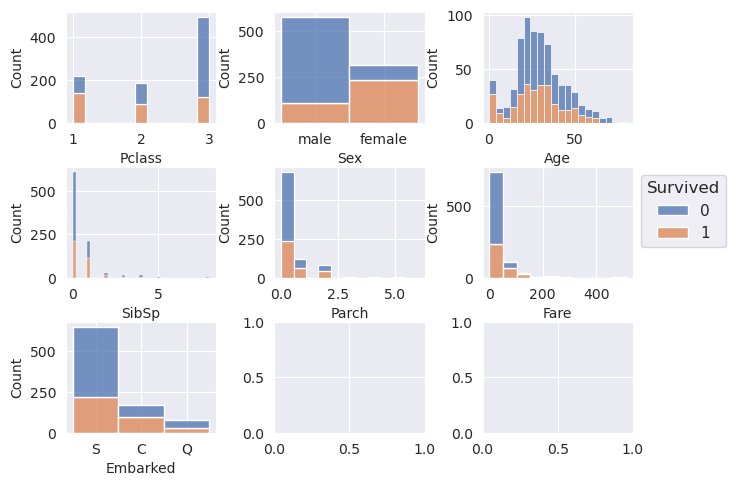

In [10]:
### Check feature correlation with survival
font_size = 8


def show_correlation(df: pd.DataFrame, x, ax, bins='auto', legend=False):
    y = 'Survived'
    display(df[[x, y]].groupby(x, as_index=False).mean())
    # print(df[[x, y]].groupby(y))

    h = sns.histplot(
        df,
        x=x, hue='Survived',
        multiple="stack",
        ax=ax,
        bins=bins,
        legend=legend
    )
    if legend:
        sns.move_legend(h, "upper left", bbox_to_anchor=(1, 1))


def show_histograms():
    features = []


fig, axs = plt.subplots(nrows=3, ncols=3)
fig.tight_layout()
sns.set()

show_correlation(train_df, 'Pclass', axs[0][0])
show_correlation(train_df, 'Sex', axs[0][1])
show_correlation(train_df, 'Age', axs[0][2])
show_correlation(train_df, 'SibSp', axs[1][0])
show_correlation(train_df, 'Parch', axs[1][1])
show_correlation(train_df, 'Fare', axs[1][2], bins=10, legend=True)
show_correlation(train_df, 'Embarked', axs[2][0])

/home/ubuntu/tools/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ubuntu/tools/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


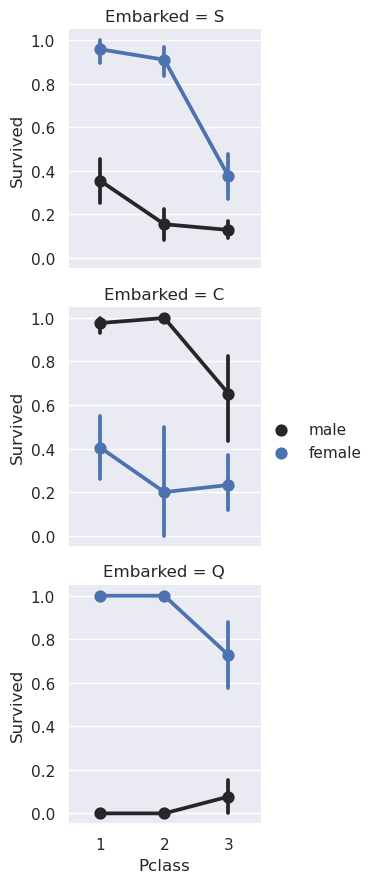

In [11]:
grid = sns.FacetGrid(train_df, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

/home/ubuntu/tools/miniconda3/envs/ml/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


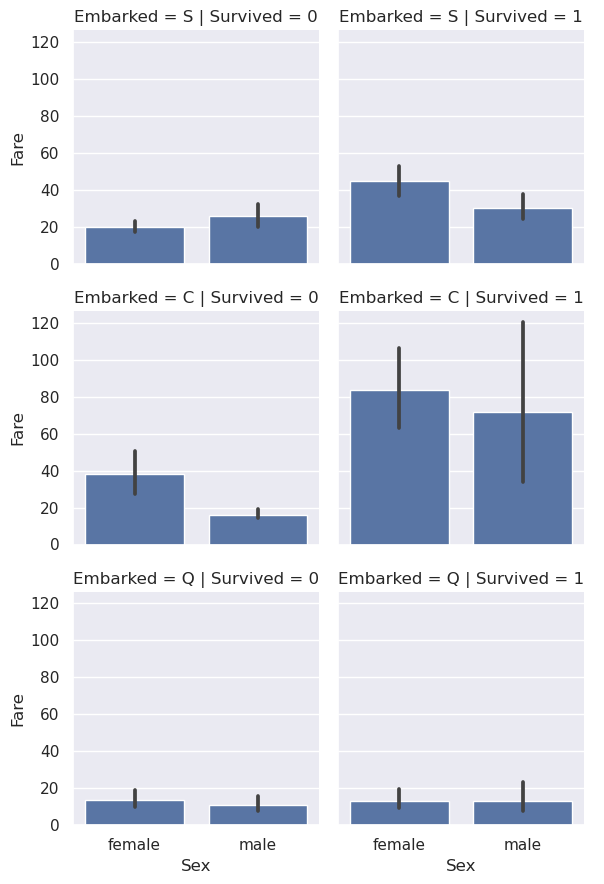

In [12]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend()


In [13]:
names = pd.concat([train_df.Name, test_df.Name])
titles = names.str.extract('.*, ([A-Za-z]+)\.')
titles.columns = ['title']
titles

title
0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
..      ...
413      Mr
414    Dona
415      Mr
416      Mr
417  Master

[1309 rows x 1 columns]

In [14]:
titles.describe()

title
count   1308
unique    17
top       Mr
freq     757

In [15]:
titles.value_counts()

title   
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Mme           1
Capt          1
Lady          1
Jonkheer      1
Dona          1
Don           1
Sir           1
dtype: int64

In [16]:
def print_title_details(title):
    display(train_df[train_df.Name.str.contains(f' {title}')][['Name', 'Sex', 'Survived']])


print_title_details('Rev')
print_title_details('Dr')
print_title_details('Col')
print_title_details('Ms')
print_title_details('Major')
print_title_details('Mlle')

print_title_details('Don')
print_title_details('Mme')
print_title_details('Lady')
print_title_details('Sir')
print_title_details('Capt')
print_title_details('Jonkheer')

Name   Sex  Survived
149  Byles, Rev. Thomas Roussel Davids  male         0
150         Bateman, Rev. Robert James  male         0
249      Carter, Rev. Ernest Courtenay  male         0
626     Kirkland, Rev. Charles Leonard  male         0
848                  Harper, Rev. John  male         0
886              Montvila, Rev. Juozas  male         0

Name     Sex  Survived
245         Minahan, Dr. William Edward    male         0
317                Moraweck, Dr. Ernest    male         0
398                    Pain, Dr. Alfred    male         0
632           Stahelin-Maeglin, Dr. Max    male         1
660       Frauenthal, Dr. Henry William    male         1
679  Cardeza, Mr. Thomas Drake Martinez    male         1
766           Brewe, Dr. Arthur Jackson    male         0
796         Leader, Dr. Alice (Farnham)  female         1

Name   Sex  Survived
647  Simonius-Blumer, Col. Oberst Alfons  male         1
694                      Weir, Col. John  male         0

Name     Sex  Survived
443  Reynaldo, Ms. Encarnacion  female         1

Name   Sex  Survived
449     Peuchen, Major. Arthur Godfrey  male         1
536  Butt, Major. Archibald Willingham  male         0

Name     Sex  Survived
641                              Sagesser, Mlle. Emma  female         1
710  Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")  female         1

Name   Sex  Survived
30     Uruchurtu, Don. Manuel E  male         0
544  Douglas, Mr. Walter Donald  male         0

Name     Sex  Survived
369  Aubart, Mme. Leontine Pauline  female         1

Name     Sex  Survived
556  Duff Gordon, Lady. (Lucille Christiana Sutherl...  female         1

Name   Sex  Survived
599  Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")  male         1

Name   Sex  Survived
745  Crosby, Capt. Edward Gifford  male         0

Name   Sex  Survived
822  Reuchlin, Jonkheer. John George  male         0

##### Features to use:
* Pclass
* Sex
* Age
* SibSp
* Parch
* Fare
* Embarked

##### Features to add:
* title (extracted from name)
    * Mr
    * Miss
    * Mrs
    * Master

    * Rev -> Mr
    * Dr -> Mr/Mrs
    * Col -> Mr
    * Ms -> Mrs
    * Major -> Mr
    * Mlle -> Mrs


## Fixing/enhancing data

In [17]:
train_df_fixed = train_df.copy()
test_df_fixed = test_df.copy()

In [18]:
test_df_fixed

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

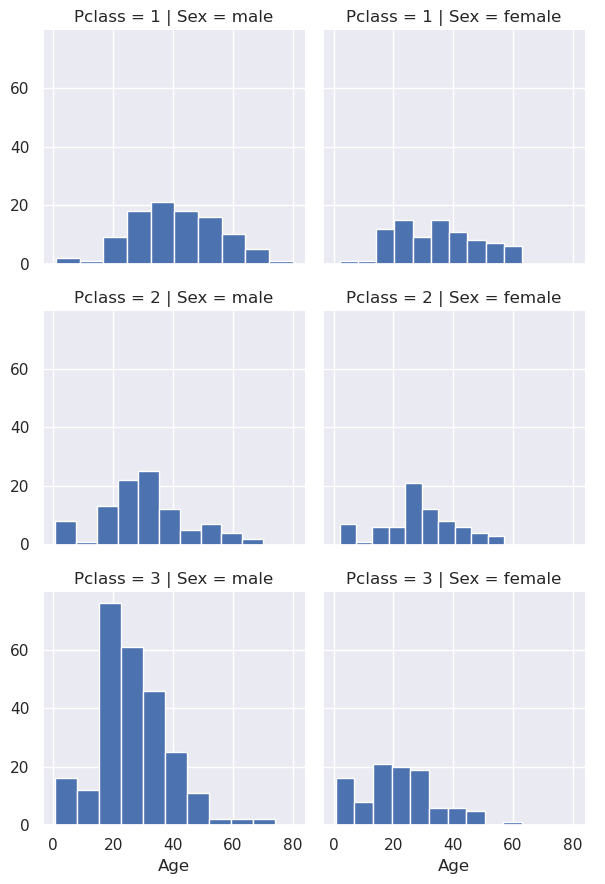

In [19]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex')
grid.map(plt.hist, 'Age')
grid.add_legend()

In [20]:
# fill age separately for each sex and pclass
for sex in train_df.Sex.unique():
    train_s = train_df[train_df.Sex == sex]
    test_s = test_df[test_df.Sex == sex]
    for pclass in train_df.Pclass.unique():
        train_ages = train_s[train_s.Pclass == pclass]['Age']
        test_ages = test_s[test_s.Pclass == pclass]['Age']

        ages = pd.concat([train_ages.dropna(), test_ages.dropna()])
        median = np.median(ages)

        train_df_fixed.loc[(train_df_fixed.Age.isnull()) & (train_df_fixed.Sex == sex) & (
                train_df_fixed.Pclass == pclass), 'Age'] = median
        test_df_fixed.loc[(test_df_fixed.Age.isnull()) & (test_df_fixed.Sex == sex) & (
                test_df_fixed.Pclass == pclass), 'Age'] = median

In [21]:
# fill Embarked with the most common port (only 2 values are missing)
most_common_port = train_df.Embarked.value_counts().idxmax()
train_df_fixed.loc[train_df_fixed.Embarked.isnull(), 'Embarked'] = most_common_port
test_df_fixed.loc[test_df_fixed.Embarked.isnull(), 'Embarked'] = most_common_port

In [22]:
# extract title
title = 'Title'
title_pattern = '.*, ([A-Za-z]+)\.'

train_df_fixed[title] = train_df_fixed.Name.str.extract(title_pattern)
test_df_fixed[title] = test_df_fixed.Name.str.extract(title_pattern)

display(train_df_fixed.Title.value_counts())
display(test_df_fixed.Title.value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [23]:
# map rare titles
to_mr = ['Rev', 'Col', 'Major', 'Don', 'Sir', 'Capt', 'Jonkheer']
to_mrs = ['Ms', 'Mlle', 'Mme', 'Lady', 'Dona']

important_mr = 'important_mr'
for t in to_mr:
    train_df_fixed.loc[train_df_fixed.Title == t, 'Title'] = important_mr
    test_df_fixed.loc[test_df_fixed.Title == t, 'Title'] = important_mr
for t in to_mrs:
    train_df_fixed.loc[train_df_fixed.Title == t, 'Title'] = 'Mrs'
    test_df_fixed.loc[test_df_fixed.Title == t, 'Title'] = 'Mrs'

train_df_fixed.loc[(train_df_fixed.Title == 'Dr') & (train_df_fixed.Sex == 'male'), 'Title'] = 'Mr'
train_df_fixed.loc[(train_df_fixed.Title == 'Dr') & (train_df_fixed.Sex == 'female'), 'Title'] = 'Mrs'

test_df_fixed.loc[(test_df_fixed.Title == 'Dr') & (test_df_fixed.Sex == 'male'), 'Title'] = 'Mr'
test_df_fixed.loc[(test_df_fixed.Title == 'Dr') & (test_df_fixed.Sex == 'female'), 'Title'] = 'Mrs'

display(train_df_fixed.Title.value_counts())
display(test_df_fixed.Title.value_counts())
# train_df_fixed.loc[(train_df_fixed.Age.isnull()) & (train_df_fixed.Sex == sex) & (train_df_fixed.Pclass == pclass), 'Age'] = median

Mr              523
Miss            182
Mrs             131
Master           40
important_mr     14
Name: Title, dtype: int64

Mr              241
Miss             78
Mrs              74
Master           21
important_mr      4
Name: Title, dtype: int64

In [24]:
# fix fare
train_fares = train_df.Fare.dropna()
test_fares = test_df.Fare.dropna()

fares = pd.concat([train_fares, test_fares])
fare_median = np.median(fares)

train_df_fixed.loc[(train_df_fixed.Fare.isnull()), 'Fare'] = fare_median
test_df_fixed.loc[(test_df_fixed.Fare.isnull()), 'Fare'] = fare_median

## Correlation map

In [25]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']
target_column = 'Survived'

<Axes: >

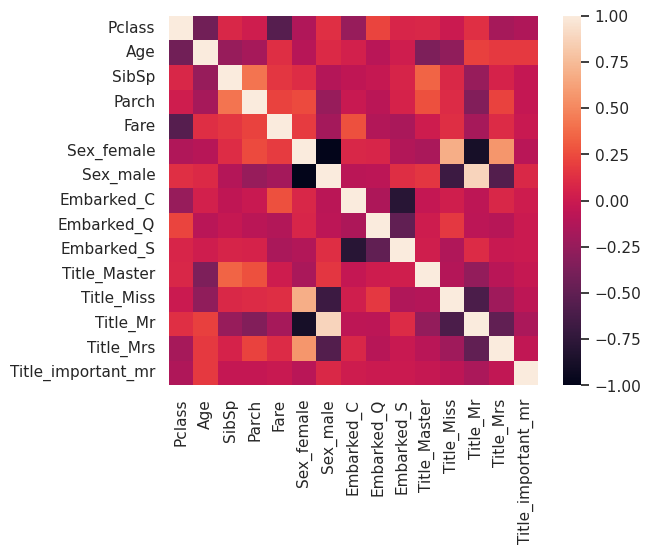

In [26]:
X = pd.get_dummies(train_df_fixed[features_columns])

fig.tight_layout()
sns.heatmap(X.corr(), square=True, annot=False)

# Test model

In [27]:
X = pd.get_dummies(train_df_fixed[features_columns])
y = train_df_fixed[target_column]

X_test = pd.get_dummies(test_df_fixed[features_columns])

In [28]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.model_selection import KFold

train_size = X.shape[0]
test_size = X_test.shape[0]
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)


def out_of_fold_prediction(classifier, x_train, y_train, x_test):
    oof_train_pred = np.zeros(train_size)
    oof_test_pred_folds = np.zeros((n_splits, test_size))
    scores = np.zeros(n_splits)

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_fold = x_train.iloc[train_index]
        y_fold = y_train.iloc[train_index]
        x_test_fold = x_train.iloc[test_index]
        y_test_fold = y_train.iloc[test_index]

        classifier.fit(x_fold, y_fold)

        scores[i] = model.score(x_test_fold, y_test_fold)

        fold_pred = classifier.predict(x_test_fold)
        oof_train_pred[test_index] = fold_pred

        test_pred = classifier.predict(x_test)
        oof_test_pred_folds[i, :] = test_pred

    oof_test_pred = np.zeros((test_size,))
    oof_test_pred[:] = oof_test_pred_folds.mean(axis=0)  # average test pred from all folds
    return oof_train_pred.reshape(-1, 1), oof_test_pred.reshape(-1, 1), scores.mean()

In [29]:
from sklearn.model_selection import train_test_split

X_split_train, X_split_test, y_split_train, y_split_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Random forest model

In [30]:
best = 0
best_params = None

for n_estimators in [5, 13, 66, 99, 167, 187, 256, 500]:
    for max_depth in [1, 2, 5]:
        for min_samples_leaf in [1, 2]:
            model = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=SEED)
            model.fit(X_split_train, y_split_train)
            score = model.score(X_split_test, y_split_test)

            if score > best:
                best = score
                best_params = (n_estimators, max_depth, min_samples_leaf)

            if score > 0.81:
                print(f'{score} ({n_estimators}|{max_depth})')

print(f'BEST: {best} ({best_params})')

0.8156424581005587 (5|5)
0.8100558659217877 (13|5)
0.8100558659217877 (66|5)
0.8156424581005587 (99|5)
0.8156424581005587 (99|5)
0.8156424581005587 (167|5)
0.8212290502793296 (167|5)
0.8156424581005587 (187|5)
0.8212290502793296 (187|5)
0.8156424581005587 (256|5)
0.8156424581005587 (256|5)
0.8212290502793296 (500|5)
0.8212290502793296 (500|5)
BEST: 0.8212290502793296 ((167, 5, 2))


In [31]:
rf_model = RandomForestClassifier(
    n_estimators=167,
    max_depth=5,
    min_samples_leaf=2,
    random_state=SEED)
rf_oof_train, rf_oof_test, rf_score = out_of_fold_prediction(rf_model, X, y, X_test)

print(rf_score)

0.8440210909547423


### AdaBoostClassifier

In [32]:
best = 0
best_params = None

for n_estimators in [5, 13, 66, 99, 167, 187, 256, 500]:
    for learning_rate in [0.02, 0.3, 0.56, 0.78, 1.0]:
        model = AdaBoostClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=SEED
        )

        model.fit(X_split_train, y_split_train)
        score = model.score(X_split_test, y_split_test)

        if score > best:
            best = score
            best_params = (n_estimators, learning_rate)

        if score > 0.81:
            print(f'{score} ({n_estimators}|{learning_rate})')

print(f'BEST: {best} ({best_params})')

0.8156424581005587 (13|0.78)
0.8100558659217877 (13|1.0)
0.8156424581005587 (66|0.3)
0.8100558659217877 (66|0.56)
0.8100558659217877 (99|0.78)
0.8100558659217877 (167|0.3)
0.8156424581005587 (167|0.78)
0.8100558659217877 (167|1.0)
0.8100558659217877 (187|0.3)
0.8100558659217877 (187|0.56)
0.8156424581005587 (187|0.78)
0.8100558659217877 (187|1.0)
0.8100558659217877 (256|0.3)
0.8156424581005587 (256|0.56)
0.8156424581005587 (256|0.78)
0.8156424581005587 (256|1.0)
0.8212290502793296 (500|0.02)
0.8156424581005587 (500|0.3)
0.8100558659217877 (500|0.56)
0.8100558659217877 (500|0.78)
0.8212290502793296 (500|1.0)
BEST: 0.8212290502793296 ((500, 0.02))


In [33]:
ab_model = AdaBoostClassifier(
    n_estimators=500,
    learning_rate=0.02,
    random_state=SEED
)
ab_oof_train, ab_oof_test, ab_score = out_of_fold_prediction(ab_model, X, y, X_test)

print(ab_score)

0.8721109785951917


### GradientBoostingClassifier

In [34]:
gb_best = 0
gb_best_params = None

for n_estimators in [5, 13, 66, 99, 167, 187, 256, 500]:
    for max_depth in [2, 5]:
        for min_samples_leaf in [1, 2]:
            model = GradientBoostingClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=SEED)
            model.fit(X_split_train, y_split_train)
            score = model.score(X_split_test, y_split_test)

            if score > gb_best:
                gb_best = score
                gb_best_params = (n_estimators, max_depth, min_samples_leaf)

            if score > 0.81:
                print(f'{score} ({n_estimators}|{max_depth})')

print(f'BEST: {gb_best} ({gb_best_params})')

0.8324022346368715 (13|5)
0.8435754189944135 (13|5)
0.8156424581005587 (66|2)
0.8435754189944135 (66|5)
0.8435754189944135 (66|5)
0.8324022346368715 (99|5)
0.8547486033519553 (99|5)
0.8156424581005587 (167|2)
0.8379888268156425 (167|2)
0.8212290502793296 (167|5)
0.8379888268156425 (167|5)
0.8156424581005587 (187|2)
0.8379888268156425 (187|2)
0.8212290502793296 (187|5)
0.8435754189944135 (187|5)
0.8268156424581006 (256|2)
0.8324022346368715 (256|2)
0.8379888268156425 (256|5)
0.8212290502793296 (256|5)
0.8659217877094972 (500|2)
0.8603351955307262 (500|2)
0.8100558659217877 (500|5)
0.8268156424581006 (500|5)
BEST: 0.8659217877094972 ((500, 2, 1))


In [35]:
gb_model = GradientBoostingClassifier(
    n_estimators=500,
    max_depth=2,
    min_samples_leaf=1,
    random_state=SEED)
gb_oof_train, gb_oof_test, gb_score = out_of_fold_prediction(gb_model, X, y, X_test)

print(gb_score)

0.9518799824242045


### ExtraTreesClassifier

In [36]:
et_best = 0
et_best_params = None

for n_estimators in [5, 13, 66, 99, 167, 187, 256, 500]:
    for max_depth in [2, 5, None]:
        for min_samples_leaf in [1, 2]:
            model = ExtraTreesClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=SEED)
            model.fit(X_split_train, y_split_train)
            score = model.score(X_split_test, y_split_test)

            if score > et_best:
                et_best = score
                et_best_params = (n_estimators, max_depth, min_samples_leaf)

            if score > 0.81:
                print(f'{score} ({n_estimators}|{max_depth})')

print(f'BEST: {et_best} ({et_best_params})')

0.8100558659217877 (5|5)
0.8156424581005587 (5|None)
0.8156424581005587 (13|5)
0.8156424581005587 (13|5)
0.8268156424581006 (13|None)
0.8156424581005587 (66|5)
0.8156424581005587 (66|5)
0.8100558659217877 (66|None)
0.8156424581005587 (99|5)
0.8156424581005587 (99|5)
0.8212290502793296 (99|None)
0.8156424581005587 (99|None)
0.8156424581005587 (167|5)
0.8156424581005587 (167|5)
0.8156424581005587 (167|None)
0.8156424581005587 (167|None)
0.8156424581005587 (187|5)
0.8156424581005587 (187|5)
0.8156424581005587 (187|None)
0.8156424581005587 (256|5)
0.8156424581005587 (256|5)
0.8156424581005587 (256|None)
0.8100558659217877 (256|None)
0.8156424581005587 (500|5)
0.8156424581005587 (500|5)
0.8100558659217877 (500|None)
0.8156424581005587 (500|None)
BEST: 0.8268156424581006 ((13, None, 1))


In [37]:
et_model = ExtraTreesClassifier(
    n_estimators=13,
    max_depth=None,
    min_samples_leaf=1,
    random_state=SEED)
et_oof_train, et_oof_test, et_score = out_of_fold_prediction(et_model, X, y, X_test)

print(et_score)

0.85863410959764


### SVC

In [38]:
svc_best = 0
svc_best_params = None

for kernel in ['linear', 'rbf', 'sigmoid']:
    for c in [0.025, 0.11, 0.36, 0.58, 0.701]:
        model = SVC(
            C=c,
            kernel=kernel,
            random_state=SEED)
        model.fit(X_split_train, y_split_train)
        score = model.score(X_split_test, y_split_test)

        if score > svc_best:
            svc_best = score
            svc_best_params = (kernel, c)

        if score > 0.81:
            print(f'{score} ({kernel}|{c})')

print(f'BEST: {svc_best} ({svc_best_params})')

0.8212290502793296 (linear|0.11)
0.8212290502793296 (linear|0.36)
0.8212290502793296 (linear|0.58)
0.8212290502793296 (linear|0.701)
BEST: 0.8212290502793296 (('linear', 0.11))


In [39]:
svc_model = SVC(
    C=0.11,
    kernel='linear',
    random_state=SEED)
svc_oof_train, svc_oof_test, svc_score = out_of_fold_prediction(svc_model, X, y, X_test)

print(et_score)

0.85863410959764


## Model ensemble

In [40]:
import xgboost as xgb

In [41]:
x_ensemble = np.concatenate((et_oof_train, rf_oof_train, ab_oof_train, gb_oof_train, svc_oof_train), axis=1)
x_test_ensemble = np.concatenate((et_oof_test, rf_oof_test, ab_oof_test, gb_oof_test, svc_oof_test), axis=1)

In [42]:
print(x_ensemble.shape)
x_ensemble

(891, 5)


array([[1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       ...,
       [0., 1., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.]])

In [43]:
xgb_best = 0
xgb_best_params = None

for n_estimators in [10, 50, 250, 500]:
    for max_depth in [3, 5, 9, 21]:
        for grow_policy in ['depthwise', 'lossguide']:
            for lr in [0.001, 0.025, 0.13, 0.44, 0.79]:
                for gamma in [0.1, 0.9, 2]:
                    xgb_model = xgb.XGBClassifier(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        grow_policy=grow_policy,
                        learning_rate=lr,
                        gamma=gamma,
                        objective='binary:logistic',
                    )
                    xgb_model.fit(x_ensemble, y)
                    score = xgb_model.score(x_ensemble, y)

                    if score > xgb_best:
                        xgb_best = score
                        xgb_best_params = (n_estimators, max_depth, grow_policy, lr, gamma)

                    if score > 0.82:
                        print(f'{score} ({n_estimators}|{max_depth}|{grow_policy}|{lr}|{gamma})')

print(f'BEST: {xgb_best} ({xgb_best_params})')

0.8395061728395061 (10|3|depthwise|0.001|0.1)
0.8361391694725028 (10|3|depthwise|0.001|0.9)
0.8338945005611672 (10|3|depthwise|0.001|2)
0.8417508417508418 (10|3|depthwise|0.025|0.1)
0.8383838383838383 (10|3|depthwise|0.025|0.9)
0.8338945005611672 (10|3|depthwise|0.025|2)
0.8417508417508418 (10|3|depthwise|0.13|0.1)
0.8383838383838383 (10|3|depthwise|0.13|0.9)
0.8406285072951739 (10|3|depthwise|0.13|2)
0.8417508417508418 (10|3|depthwise|0.44|0.1)
0.8417508417508418 (10|3|depthwise|0.44|0.9)
0.8406285072951739 (10|3|depthwise|0.44|2)
0.8417508417508418 (10|3|depthwise|0.79|0.1)
0.8417508417508418 (10|3|depthwise|0.79|0.9)
0.8361391694725028 (10|3|depthwise|0.79|2)
0.8395061728395061 (10|3|lossguide|0.001|0.1)
0.8361391694725028 (10|3|lossguide|0.001|0.9)
0.8338945005611672 (10|3|lossguide|0.001|2)
0.8417508417508418 (10|3|lossguide|0.025|0.1)
0.8383838383838383 (10|3|lossguide|0.025|0.9)
0.8338945005611672 (10|3|lossguide|0.025|2)
0.8417508417508418 (10|3|lossguide|0.13|0.1)
0.8383838383

# Fit the final model and create results

In [44]:
xgb_model = xgb.XGBClassifier(
                        n_estimators=10,
                        max_depth=3,
                        grow_policy='depthwise',
                        learning_rate=0.025,
                        gamma=0.1,
                        objective='binary:logistic',
                    )
xgb_model.fit(x_ensemble, y)
xgb_model.score(x_ensemble, y)

0.8417508417508418

In [45]:
predictions = xgb_model.predict(x_test_ensemble)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('dataset/submission2.csv', index=False)